In [49]:
import pandas as pd
import numpy as np
#from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
jnj = pd.read_excel('~/capp30254_fight_potatoes/data processing/data_processed_v2_0513.xlsx', sheet_name='JNJ')
abt = pd.read_excel('~/capp30254_fight_potatoes/data processing/data_processed_v2_0513.xlsx', sheet_name='ABT')

In [ ]:
# Some separation into train/test??? IDK

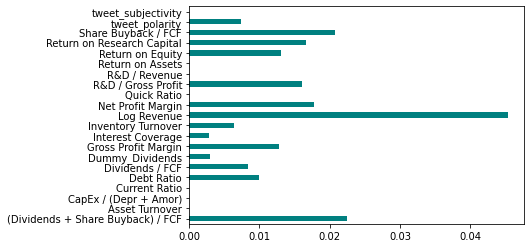

In [67]:
# feature selection for JNJ
jnj['diff'] = jnj['Stock price'].diff()
X_jnj = jnj.iloc[:, 3: -1]
Y_jnj = np.where(jnj['diff'] >= 0, 1, 0)
importances = mutual_info_classif(X_jnj, Y_jnj)
feat_importances_jnj = pd.Series(importances, jnj.columns[3: -1])
feat_importances_jnj.plot(kind='barh', color ="teal")
plt.show()

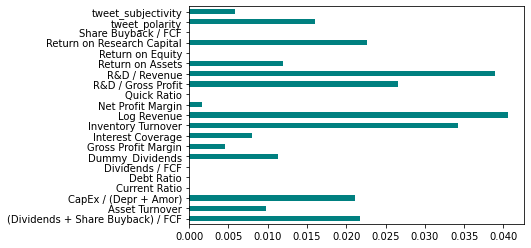

In [55]:
# feature selection for ABT
abt['diff'] = abt['Stock price'].diff()
X_abt = abt.iloc[:, 3: -1]
Y_abt = np.where(abt['diff'] >= 0, 1, 0)
importances = mutual_info_classif(X_abt, Y_abt)
feat_importances_abt = pd.Series(importances, abt.columns[3: -1])
feat_importances_abt.plot(kind='barh', color ="teal")
plt.show()

In [89]:
# subset cols deemed 'relevant'
# jnj
feat_jnj = feat_importances_jnj.to_frame('importance')
feat_jnj = feat_jnj[feat_jnj['importance'] > 0]
jnj_lst = list(feat_jnj.index)
X1_jnj = X_jnj[np.intersect1d(X_jnj.columns, jnj_lst)]

# abt
feat_abt = feat_importances_abt.to_frame('importance')
feat_abt = feat_abt[feat_abt['importance'] > 0]
abt_lst = list(feat_abt.index)
X1_abt = X_abt[np.intersect1d(X_abt.columns, abt_lst)]